# Machine Learning Project

In [1]:
#importing the required libraries for our project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('framingham.csv') #importing the data file using pandas

In [3]:
data.head() #checking the first five rows of the dataframe

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.describe() #describing the data set

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
data.isnull().sum() #checking the null values in the dataframe

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
data.fillna(data.median(), inplace = True) #filling all the null values of the columns with their respective medians

In [7]:
data.isnull().sum() #confirm that there are no remaining null values

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
#dividing the data into feature and target
#into feature
feature = data.drop('TenYearCHD', axis = 1)
feature.shape

(4238, 15)

In [9]:
#into target
target = data['TenYearCHD']
target.shape

(4238,)

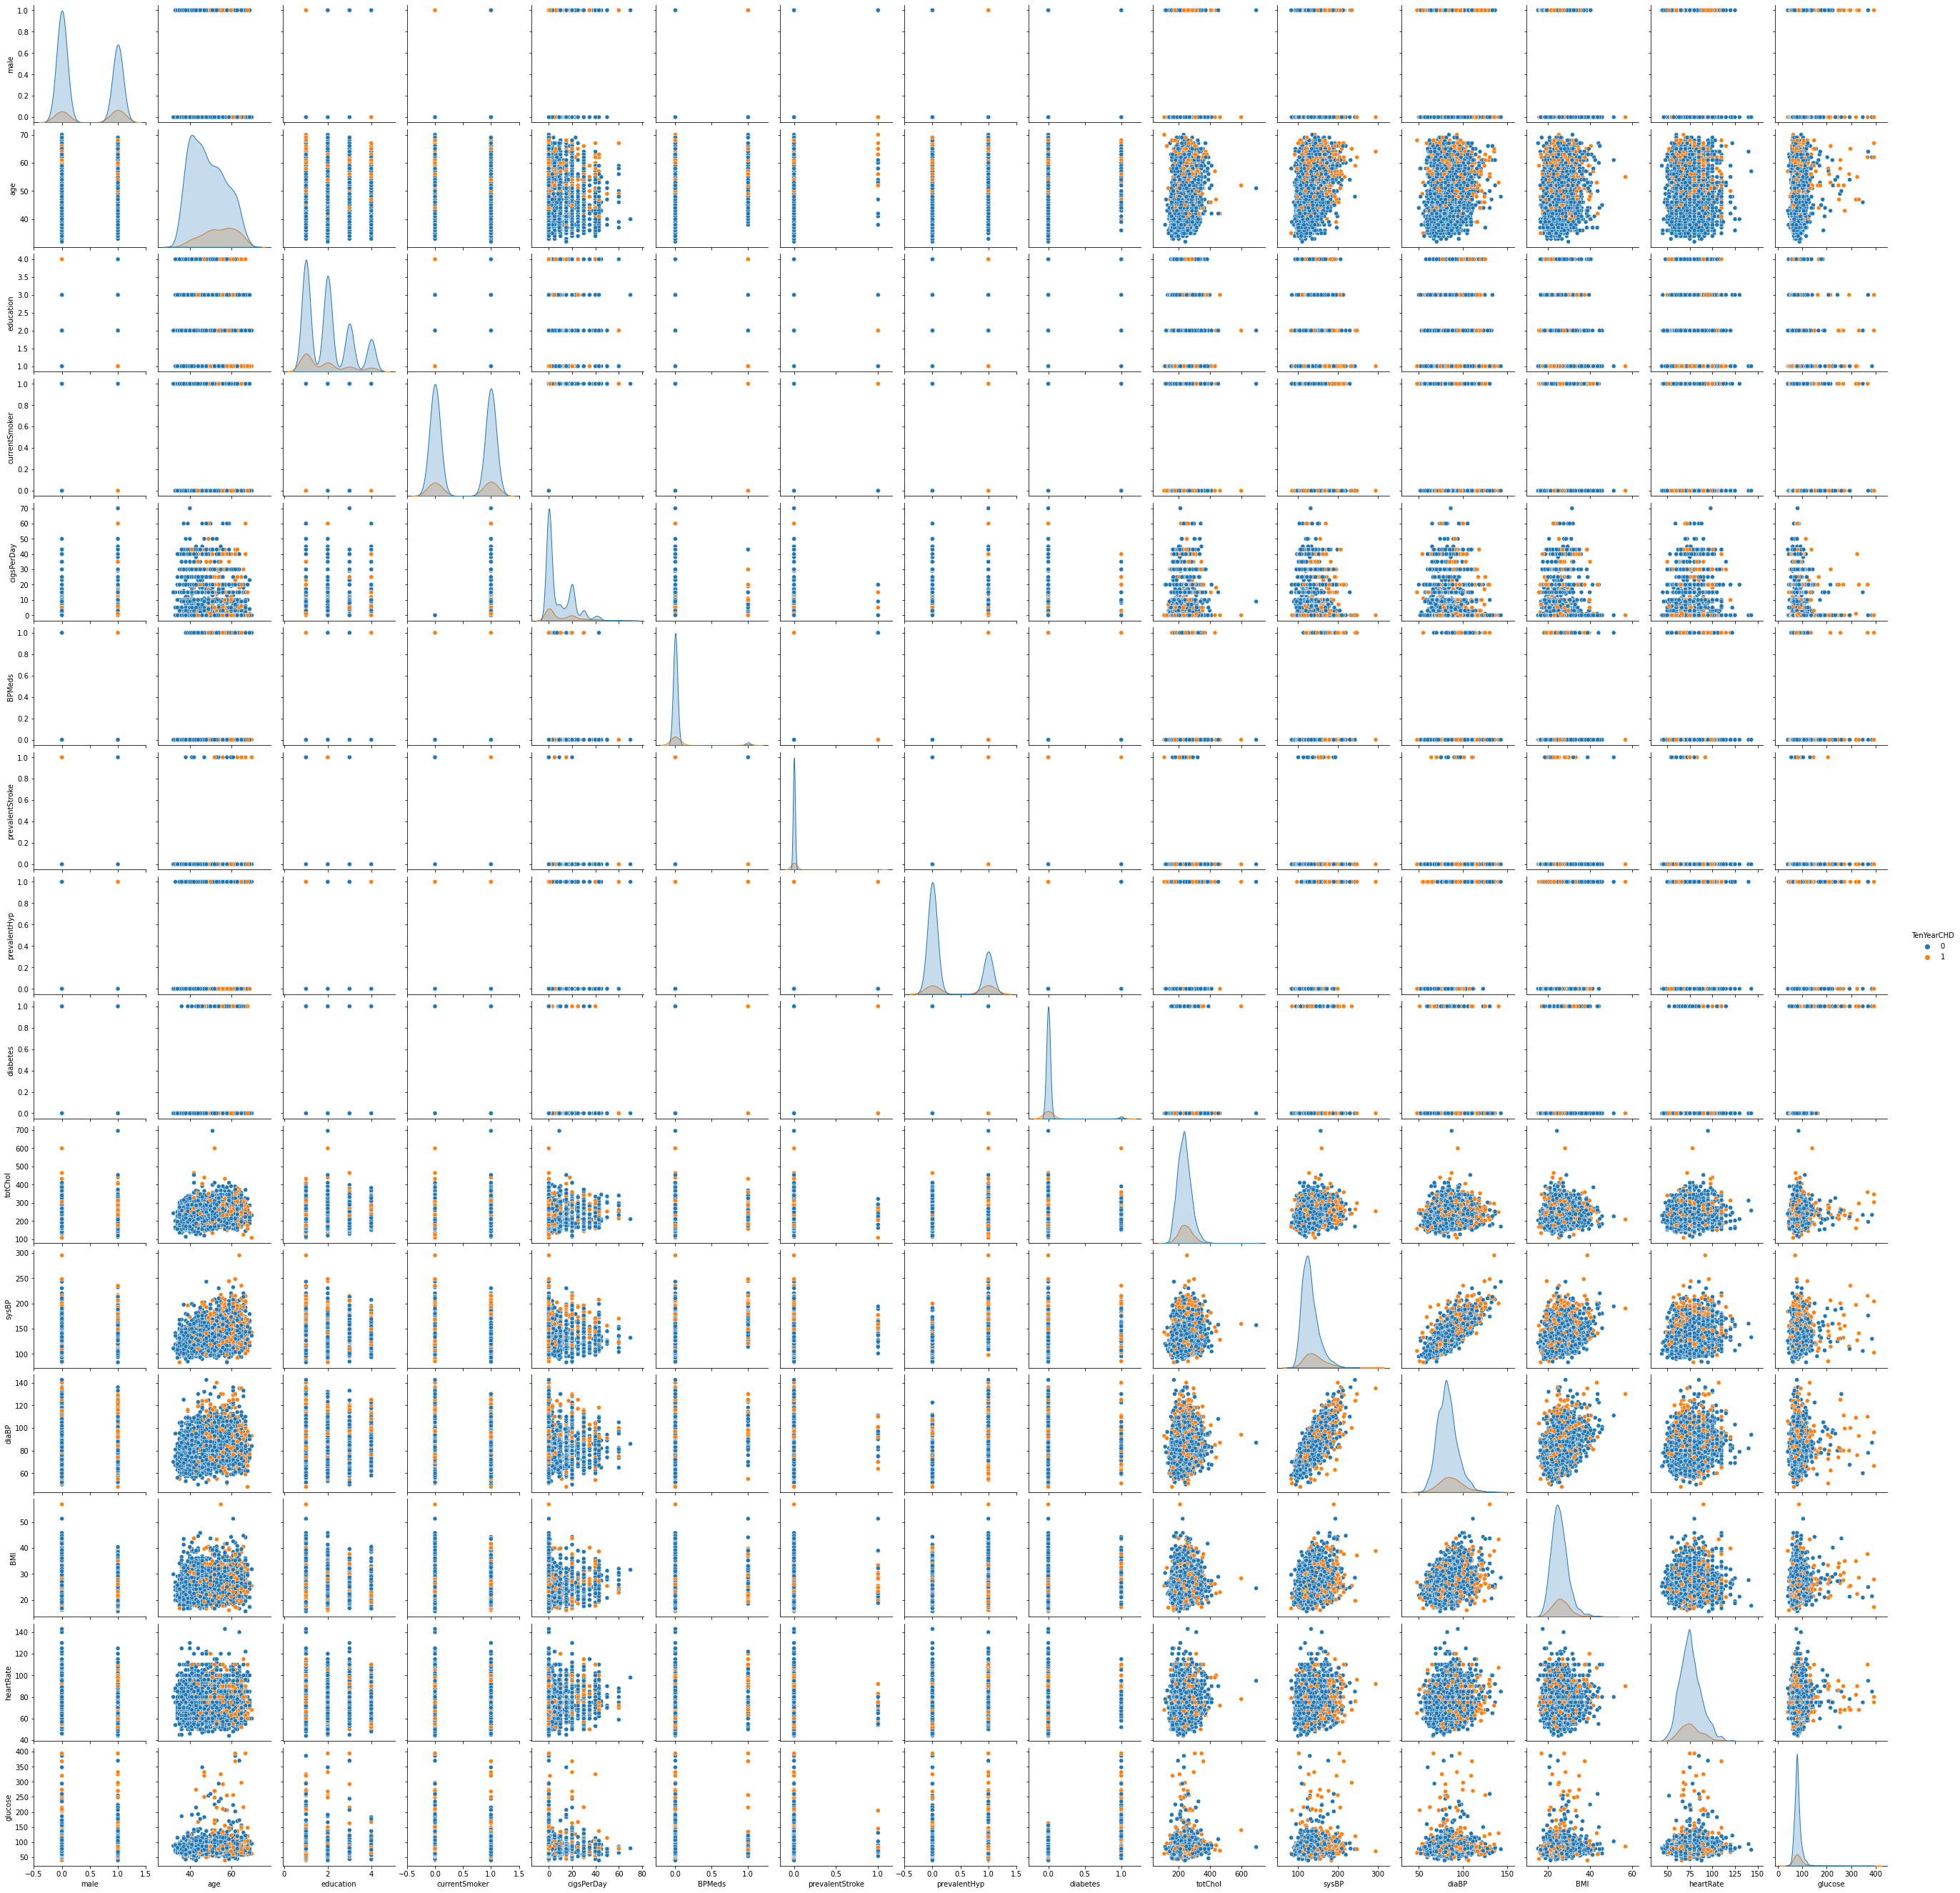

In [10]:
sns.pairplot(data, hue = 'TenYearCHD', height = 2.5); #plotting the pairplot of the data

In [11]:
#importing the supporting libraries for the machine learning model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Naive Bayes Algorithm

In [12]:
#splitting the data into training set and testing set
#here we have used 75% of the data as training set

X1, X2, Y1, Y2 = train_test_split(feature, target, random_state = 0, train_size = 0.75)

In [13]:
#creating a baseline model
#here we use naive bayes Gaussian NB model as a baseline model

from sklearn.naive_bayes import GaussianNB #importing the model
model = GaussianNB()                       #instantiation of the model
Y_model1 = model.fit(X1, Y1).predict(X2)   #fit data to the model and predict the target for the unknown data

In [14]:
accuracy_score(Y2, Y_model1) #finding the accuracy score

0.8160377358490566

### Looking at the classification report and confusion matrix

In [15]:
print(classification_report(Y2, Y_model1))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       890
           1       0.37      0.21      0.27       170

    accuracy                           0.82      1060
   macro avg       0.62      0.57      0.58      1060
weighted avg       0.78      0.82      0.79      1060



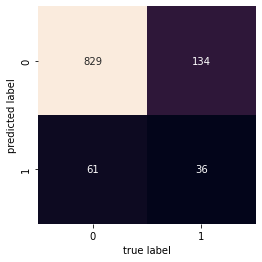

In [16]:
#confusion matrix

mat = confusion_matrix(Y2, Y_model1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

This baseline model or naive bayes model gave us accuracy of 81.60%. Which is nice, without doing any hyperparameter tuning. Now let's see whether we can increase this accuracy with other models

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression   #import the required model
model = LogisticRegression(random_state=0, max_iter=3000) #default value for max_iter is set as 3000
model.fit(X1, Y1) #fit the data to the model

LogisticRegression(max_iter=3000, random_state=0)

In [18]:
predicted1 = model.predict(X2) #predict the target for the unknwon data

In [19]:
accuracy_score(Y2, predicted1) #find the accuracy score

0.8443396226415094

### Classification report

In [20]:
print(classification_report(Y2, predicted1))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       890
           1       0.65      0.06      0.12       170

    accuracy                           0.84      1060
   macro avg       0.75      0.53      0.52      1060
weighted avg       0.82      0.84      0.79      1060



### Confusion matrix

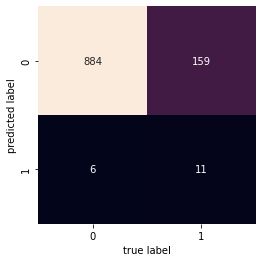

In [21]:
#confusion matrix

mat = confusion_matrix(Y2, predicted1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

Logistic Regression gave us accuracy of 84.43%. Which is nice, without doing any hyperparameter tuning. And Precision for class 1 is 0.65, which is very nice

# Support Vector Machine

In [22]:
from sklearn.svm import SVC #importing the SVC model
#initially we choose the default hyperparameter settings and see the accuracy of the model

model = SVC()                  #instantiation of the model
model.fit(X1, Y1)              #fit data to the model 
predicted2 = model.predict(X2) #predict the target for the unknown data

In [23]:
accuracy_score(Y2, predicted2) #finding the accuracy score

0.839622641509434

In [24]:
model.get_params() #these are the hyperparameters used by default

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Lets see the classification report and the confusion matrix

In [25]:
#classification report

print(classification_report(Y2, predicted2)) 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       890
           1       0.50      0.01      0.01       170

    accuracy                           0.84      1060
   macro avg       0.67      0.50      0.46      1060
weighted avg       0.79      0.84      0.77      1060



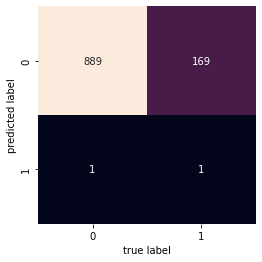

In [26]:
#confusion matrix

mat = confusion_matrix(Y2, predicted2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

Here precision for class 1 is only 0.5, if we did some hyperparameter tuning then we can change this, only 1 data is predicted as True Diseases, so lets change this by doing hyperparamter tuning

Using Cross Validation to enhance the model accuracy

In [27]:
from sklearn.model_selection import GridSearchCV #importing the grid search 
#defining paramter range
param_grid = {'C': [1,5,10,50],
             'gamma': [0.0001, 0.0005, 0.001, 0.005], 
             'kernel':['rbf']}
grid = GridSearchCV(model, param_grid,refit = True, verbose = 3) #finding the best paramter combination and apply it to model

In [28]:
grid.fit(X1, Y1) #fit the data to the hyperparameter tuned model

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.852 total time=   0.1s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.851 total time=   0.1s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.849 total time=   0.1s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.854 total time=   0.1s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.850 total time=   0.2s
[CV 1/5] END .....C=1, gamma=0.0005, kernel=rbf;, score=0.849 total time=   0.1s
[CV 2/5] END .....C=1, gamma=0.0005, kernel=rbf;, score=0.851 total time=   0.1s
[CV 3/5] END .....C=1, gamma=0.0005, kernel=rbf;, score=0.846 total time=   0.1s
[CV 4/5] END .....C=1, gamma=0.0005, kernel=rbf;, score=0.854 total time=   0.1s
[CV 5/5] END .....C=1, gamma=0.0005, kernel=rbf;, score=0.850 total time=   0.2s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.846 total time=   0.2s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005],
                         'kernel': ['rbf']},
             verbose=3)

In [29]:
print(grid.best_params_) #printing the best parameters found by gridSearchCV
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.0001)


In [30]:
predicted3 = grid.predict(X2) #predicting the target for unknown data

In [31]:
accuracy_score(Y2, predicted3) #printing the accuracy score

0.839622641509434

### Lets see the classification report and the confusion matrix

In [32]:
#classification report
print(classification_report(Y2, predicted3))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       890
           1       0.50      0.02      0.04       170

    accuracy                           0.84      1060
   macro avg       0.67      0.51      0.48      1060
weighted avg       0.79      0.84      0.77      1060



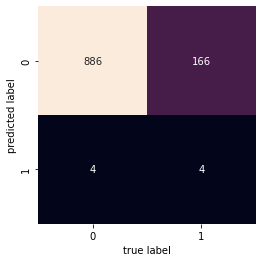

In [33]:
#confusion matrix
mat2 = confusion_matrix(Y2, predicted3)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

Here the accuracy is 83.9% and the precision for class 1 is 0.5 which did not change even after hyperparameter tuning.

# Random Forest


In [34]:
from sklearn.ensemble import RandomForestClassifier #importing the required model
#using the default values for hyperparameters and finding the accuracy of the model

model = RandomForestClassifier()  #instantiation of the model
model.fit(X1, Y1)                 #fit data to the model 
pred = model.predict(X2)          #predict the target for the unknown data

In [35]:
model.get_params() #finding the default hyperparametes used

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
accuracy_score(Y2, pred) #finding the accuracy score

0.8386792452830188

### Classification Report

In [37]:
print(classification_report(Y2, pred)) 

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       890
           1       0.47      0.05      0.09       170

    accuracy                           0.84      1060
   macro avg       0.66      0.52      0.50      1060
weighted avg       0.78      0.84      0.78      1060



### Confusion Matrix

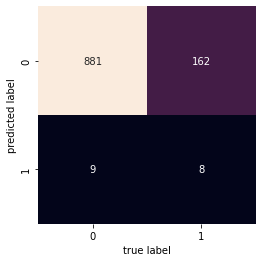

In [38]:
mat = confusion_matrix(Y2, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Using default values for hyperparameters we got accuracy score of 83.77%. The precision value for the class 1 is not very good, so let us do some hyperparameter tuning.

In [39]:
from sklearn.model_selection import RandomizedSearchCV #importing the required model
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

#number of features to consider at every split
max_features = ['auto', 'sqrt']

#mamximum number of levels in trees
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

#minimum number of samples required to split a node
min_samples_split = [2,5,10]

#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#method of selecting samples for training each tree
bootstrap = [True, False]

#creating random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [40]:
model = RandomForestClassifier() #instantiate the model

# Random search of parameters, using 3 fold cross validation
# search across 100 different combinations, and use all available cores

random_model = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3,
                                  verbose=2, random_state=42, n_jobs = -1)

random_model.fit(X1, Y1) #fit the data to the model

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

#### This fitting took a very long time. This hyperparameter tuning took us very long time to process.

In [41]:
predicted4 = random_model.predict(X2) #predict the target for the unknown data

In [42]:
accuracy_score(Y2, predicted4) #print the accuracy score

0.8415094339622642

### Classification Report

In [43]:
print(classification_report(Y2, predicted4)) 

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       890
           1       0.57      0.05      0.09       170

    accuracy                           0.84      1060
   macro avg       0.71      0.52      0.50      1060
weighted avg       0.80      0.84      0.78      1060



### Confusion Matrix

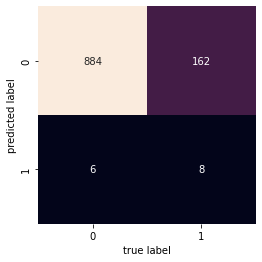

In [44]:
mat2 = confusion_matrix(Y2, predicted4)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

Here the accuracy score after hyperparamter tuning is 84.15% which increased compared to without hyperparameter tuning. And the accuracy score is also 0.57 which also increased compared to without hyperparameter tuning. But the time taken to do this tuning is very long, hence it is not very good model

## Stand out model for me

### The logistic regression model is the standout model for me as, the accuracy score is also good in this model and the precision for the class 1 is also 0.65